In [2]:
#pip install yfinance
#yahoo finance as data source
import yfinance as yf

In [3]:
stock_symbol = 'NTPC.NS'

In [4]:
#last 5 years of data with interval 1 day
data = yf.download(tickers=stock_symbol,period='5y',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-21,144.333328,145.916672,143.041672,143.333328,107.439514,4958263
2017-08-22,144.833328,144.875000,139.333328,139.750000,104.753517,5514501
2017-08-23,140.000000,142.583328,139.666672,141.875000,106.346382,5016500
2017-08-24,142.500000,143.000000,140.208328,140.833328,105.565575,5959692
2017-08-28,141.416672,145.000000,141.416672,144.416672,108.251549,6243884


In [7]:
len(data)

1236

In [8]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-12,153.699997,159.000000,152.600006,158.500000,158.500000,17998843
2022-08-16,159.000000,159.800003,156.949997,158.750000,158.750000,8309725
2022-08-17,159.000000,163.649994,159.000000,161.449997,161.449997,19674110
2022-08-18,161.449997,162.649994,159.899994,160.800003,160.800003,9585888
2022-08-19,161.050003,161.649994,157.149994,157.750000,157.750000,9599472


In [9]:
opn = data[['Open']]

<AxesSubplot:xlabel='Date'>

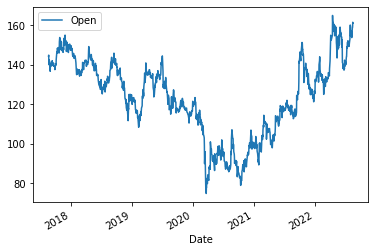

In [10]:
#plot of open prizes
opn.plot()

In [11]:
import matplotlib.pyplot as plt

In [12]:
ds = opn.values
ds

array([[144.33332825],
       [144.83332825],
       [140.        ],
       ...,
       [159.        ],
       [161.44999695],
       [161.05000305]])

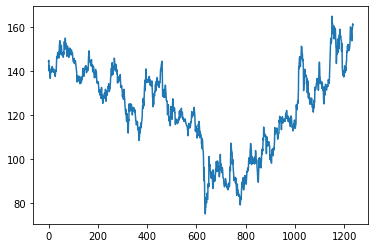

In [13]:
plt.plot(ds)

In [14]:
import numpy as np

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
# using MinMaxScalar for normalizing data between 0 and 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [17]:
len(ds_scaled), len(ds)

(1236, 1236)

In [18]:
#Definig test and train data size
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size

In [19]:
train_size, test_size

(865, 371)

In [20]:
# now splitting data between train and test
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]

In [21]:
len(ds_train),len(ds_test)

(865, 371)

In [22]:
#creating dataset in time series for LSTM model
#X[100,120,140,160,180] : y[200]
def create_ds(dataset,step):
    Xtrain , Ytrain = [] ,[]
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [23]:
#taking 100 days price as one record for training 
time_stamp = 100
x_train, y_train = create_ds(ds_train,time_stamp)
x_test, y_test = create_ds(ds_test,time_stamp)

In [24]:
x_train.shape,y_train.shape

((764, 100), (764,))

In [25]:
x_test.shape, y_test.shape

((270, 100), (270,))

In [26]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [27]:
 !pip install tensorflow
    



Defaulting to user installation because normal site-packages is not writeable


In [28]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable


In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [30]:
#creating LSTM Models using keras 
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='mean_squared_error' , optimizer='adam')
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100, batch_size=64)

Epoch 1/100
12/12 [==============================] - 13s 389ms/step - loss: 0.0903 - val_loss: 0.0209
Epoch 2/100
12/12 [==============================] - 2s 199ms/step - loss: 0.0147 - val_loss: 0.0084
Epoch 3/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0090 - val_loss: 0.0221
Epoch 4/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0062 - val_loss: 0.0118
Epoch 5/100
12/12 [==============================] - 2s 179ms/step - loss: 0.0048 - val_loss: 0.0075
Epoch 6/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0043 - val_loss: 0.0079
Epoch 7/100
12/12 [==============================] - 2s 185ms/step - loss: 0.0042 - val_loss: 0.0074
Epoch 8/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0040 - val_loss: 0.0077
Epoch 9/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0038 - val_loss: 0.0080
Epoch 10/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0038 - val_l

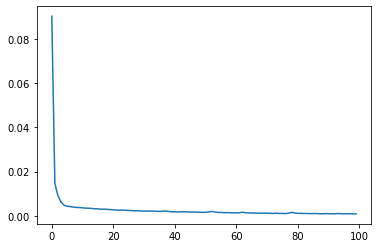

In [32]:
loss = model.history.history['loss']
plt.plot(loss)

In [33]:
# predicting on train and test data
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)


9/9 [==============================] - 1s 58ms/step


In [34]:
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

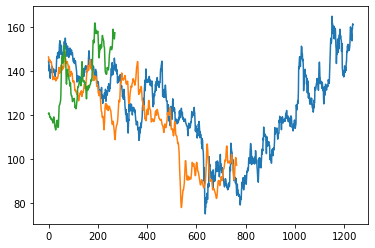

In [35]:
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [36]:
type(train_predict)

numpy.ndarray

In [37]:
test = np.vstack((train_predict,test_predict))

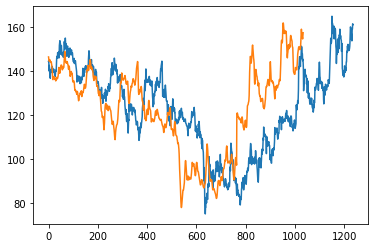

In [38]:
# Combining the predicted data to create uniform data visulization 

plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [48]:
len(ds_test)

371

In [49]:
#Getting the last 100 days record 
fut_inp = ds_test[271:]

In [50]:
fut_inp =fut_inp.reshape(1,-1)

In [51]:
tmp_inp = list(fut_inp)

In [52]:
fut_inp.shape

(1, 100)

In [53]:
# creating list of the last 100 data 

tmp_inp= tmp_inp[0].tolist()

In [55]:
# predicting next 30 days price suing the current data
# it will predict in sliding window manner (algorithm ) with stride 1

lst_output =[]
n_steps=100
i=0
while(i<30):
    if(len(tmp_inp)>100):
        fut_inp= np.array(tmp_inp[1:])
        fut_inp = fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1,n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape(1, n_steps, 1)
        yhat=model.predict(fut_inp,verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)
        

[[0.9471104741096497], [0.9451848268508911], [0.9390615820884705], [0.9320892691612244], [0.9252228736877441], [0.9187766909599304], [0.9128912091255188], [0.907597005367279], [0.9028344750404358], [0.8984875679016113], [0.8944190144538879], [0.8904983997344971], [0.8866208791732788], [0.882713794708252], [0.8787384629249573], [0.8746875524520874], [0.8705766797065735], [0.8664365410804749], [0.8623064756393433], [0.8582268953323364], [0.8542355895042419], [0.8503631949424744], [0.8466342091560364], [0.8430647850036621], [0.8396642804145813], [0.83643639087677], [0.833381175994873], [0.8304950594902039], [0.8277738690376282], [0.8252121806144714]]


In [56]:
len(ds_scaled)

1236

In [59]:
# creating a dummy plane to plot graph one after another

plot_new = np.arange(1,101)
plot_pred = np.arange(101,131)


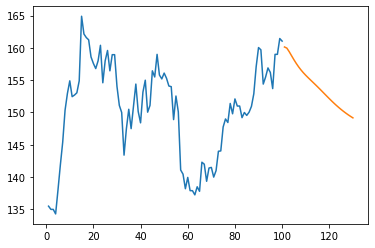

In [60]:
plt.plot(plot_new,normalizer.inverse_transform(ds_scaled[1136:]))
plt.plot(plot_pred,normalizer.inverse_transform(lst_output))

In [61]:
ds_new= ds_scaled.tolist()


len(ds_new)

1236

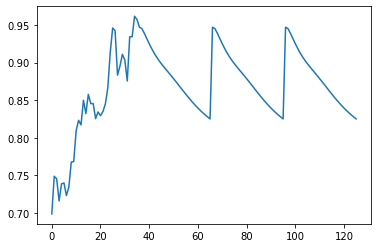

In [66]:
# extend helps us to fill the missing values with approx value 

ds_new.extend(lst_output)
plt.plot(ds_new[1200:])

In [63]:
# creating final data for plottimg 
final_graph = normalizer.inverse_transform(ds_new).tolist()

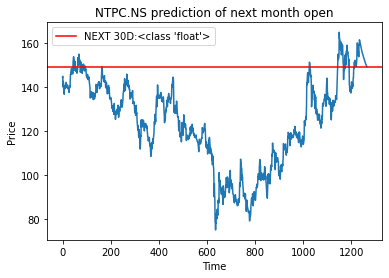

In [64]:
# ploting  final results with predicted value after 30 days 

plt.plot(final_graph,)
plt.ylabel('Price')
plt.xlabel('Time')
plt.title('{0} prediction of next month open'.format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1],color ='red',label='NEXT 30D:{0}'.format(float))
plt.legend()